In [272]:
# Standard stack of imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer # used to fill missing values, fits into pipelines
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [292]:
train = pd.read_csv('../raw_data/train.csv')
test = pd.read_csv('../raw_data/test.csv')

In [293]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [294]:
train.info()
train.isnull().sum()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [295]:
# df_num = train.select_dtypes(include=['int64', 'float64']) # if you have many numerical columns
df_num = train[['Age','SibSp','Parch','Fare']] # this is how to do it manually
# df_cat = train.select_dtypes(exclude=['int64','float64'])
df_cat = train[['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

df_num.head(10)
df_cat.head(10)

,Pclass,Sex,Ticket,Cabin,Embarked
0,3,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,3,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,3,male,373450,NaN,S
5,3,male,330877,NaN,Q
6,1,male,17463,E46,S
7,3,male,349909,NaN,S
8,3,female,347742,NaN,S
9,2,female,237736,NaN,C


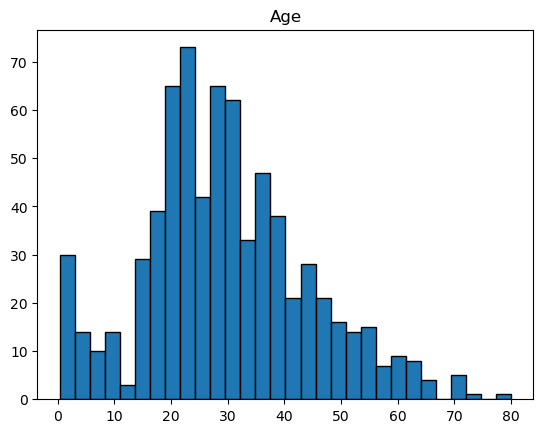

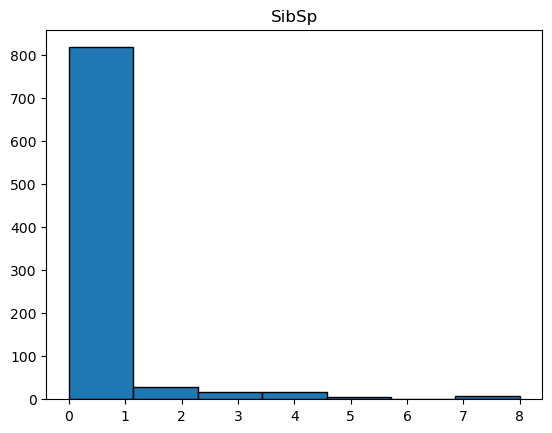

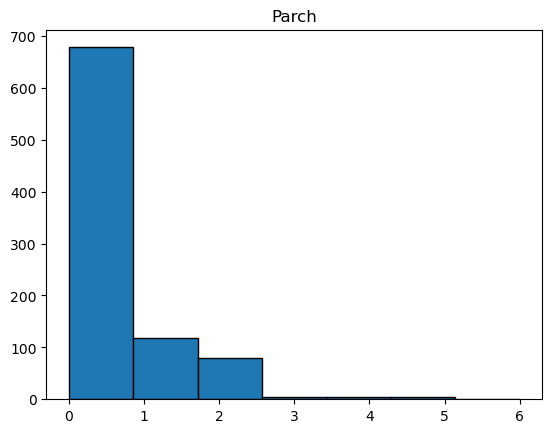

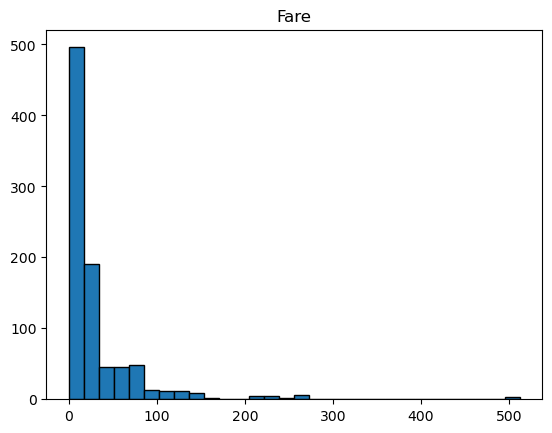

In [299]:
for col in df_num.columns:
    # Choose bin count based on unique values
    num_bins = min(30, df_num[col].nunique())
    plt.hist(df_num[col].dropna(), bins=num_bins, edgecolor='black')
    plt.title(col)
    plt.show()

<Axes: >

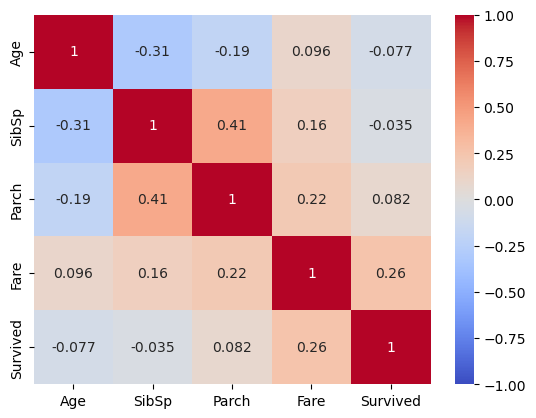

In [285]:
df_num.corr()
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# there is not that much correlation between our variables. At a glance it seems that the biggest indicator of survival would be the passenger class,
# though this correlation is still somewhat low
# there also seems to be a moderate relationship between sipsp and age

In [321]:
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'], aggfunc='mean')

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


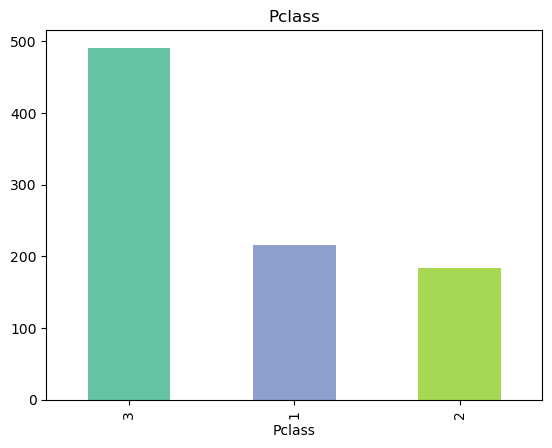

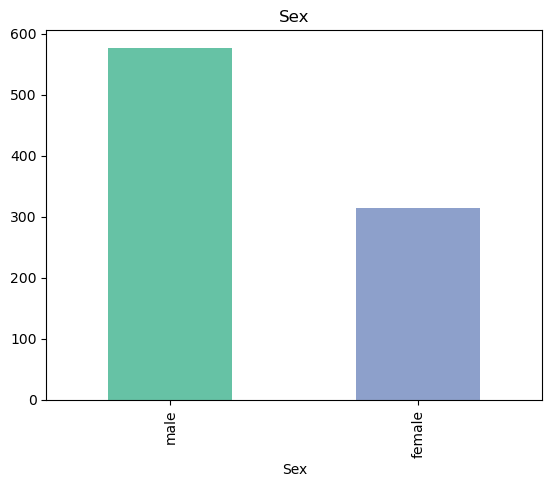

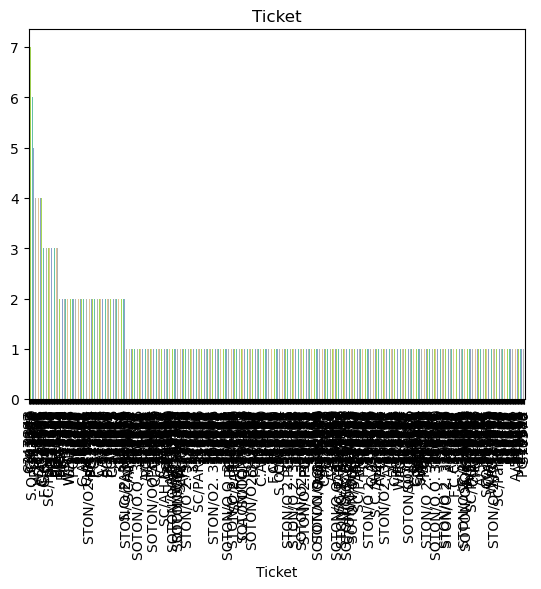

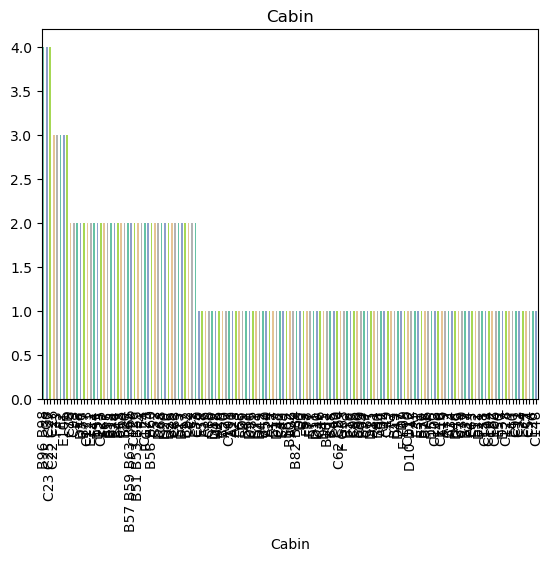

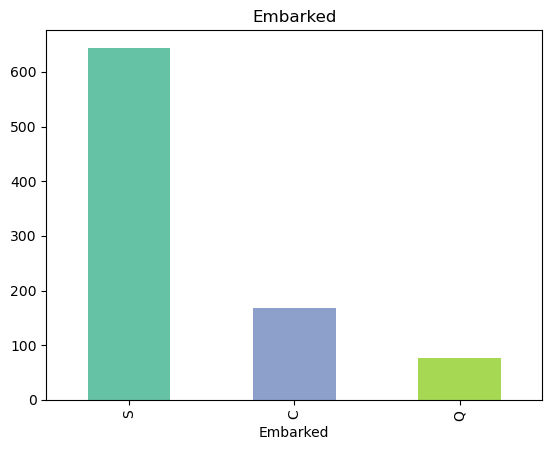

In [331]:
for i in df_cat.columns:
    colors = plt.cm.Set2(np.linspace(0, 1, 5))
    df_cat[i].value_counts().plot(kind='bar', color=colors)
    plt.title(i)
    plt.show()

In [338]:
# make a pivot table to see 
for col in ['Pclass', 'Sex', 'Embarked']:
    print(f"Survival vs {col}")
    print(pd.pivot_table(train, index='Survived', columns=col, values='Ticket', aggfunc=['count'], margins='True'))
    print()


Survival vs Pclass
         count               
Pclass       1    2    3  All
Survived                     
0           80   97  372  549
1          136   87  119  342
All        216  184  491  891

Survival vs Sex
          count          
Sex      female male  All
Survived                 
0            81  468  549
1           233  109  342
All         314  577  891

Survival vs Embarked
         count              
Embarked     C   Q    S  All
Survived                    
0           75  47  427  549
1           93  30  217  340
All        168  77  644  889



In [341]:
# since the cabin looks wack lets see if there is a way we can extract some useful information from it
df_cat.Cabin
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
train['cabin_multiple'].value_counts()

train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',